
> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [noshowappointments]

## Table of Contents


<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset gathers different variables that could provide analysis and reasons for low turn out for medical appointments.


### Question(s) for Analysis

Q1- Is there a correlation between missing the appointment and the age of the patient?

Q2- Is there a correlation between missing the appointment and the Gender of the patient?

Q3- Is there a correlation between missing the appointment and the Neighbourhood?

Q4- Is there a correlation between missing the appointment and not receiving an SMS message?

Q5- Does some factors like Scholarship and been diabetic affect showup!)

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### AN EXTRA CELL

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install pandas

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
sum(df.duplicated())

0

In [8]:
df.shape

(110527, 14)

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
df["AppointmentDay"]

0         2016-04-29T00:00:00Z
1         2016-04-29T00:00:00Z
2         2016-04-29T00:00:00Z
3         2016-04-29T00:00:00Z
4         2016-04-29T00:00:00Z
5         2016-04-29T00:00:00Z
6         2016-04-29T00:00:00Z
7         2016-04-29T00:00:00Z
8         2016-04-29T00:00:00Z
9         2016-04-29T00:00:00Z
10        2016-04-29T00:00:00Z
11        2016-04-29T00:00:00Z
12        2016-04-29T00:00:00Z
13        2016-04-29T00:00:00Z
14        2016-04-29T00:00:00Z
15        2016-04-29T00:00:00Z
16        2016-04-29T00:00:00Z
17        2016-04-29T00:00:00Z
18        2016-04-29T00:00:00Z
19        2016-04-29T00:00:00Z
20        2016-04-29T00:00:00Z
21        2016-04-29T00:00:00Z
22        2016-04-29T00:00:00Z
23        2016-04-29T00:00:00Z
24        2016-04-29T00:00:00Z
25        2016-04-29T00:00:00Z
26        2016-04-29T00:00:00Z
27        2016-04-29T00:00:00Z
28        2016-04-29T00:00:00Z
29        2016-04-29T00:00:00Z
                  ...         
110497    2016-06-01T00:00:00Z
110498  

In [11]:
bin_edges = [0, 18, 37, 55, 80, 115]

bin_labels = ['0-17', '18-36', '37-54', '55-80', '80+']

df['AgeGroup'] = pd.cut(df['Age'], bin_edges, labels = bin_labels, include_lowest = True)

df.tail()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AgeGroup
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No,55-80
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No,37-54
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No,18-36
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No,37-54
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No,37-54


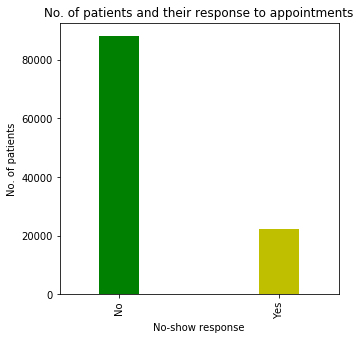

No-show
No     88208
Yes    22319
Name: No-show, dtype: int64

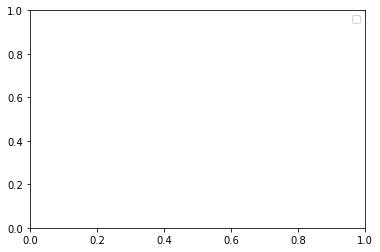

In [12]:
df['No-show'].groupby(df['No-show']).count().plot(kind='bar', color=['g', 'y'], width=0.25, figsize=(5,5))
plt.xlabel('No-show response')
plt.ylabel('No. of patients')
plt.title('No. of patients and their response to appointments')
plt.show()
plt.legend(["No","Yes"])
df['No-show'].groupby(df['No-show']).count()


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [13]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#KEEPING THE TIME AND DAY IS ENOUGH FOR ScheduledDaY AND AppointmentDay

for col in ["ScheduledDay","AppointmentDay"] :
    df[col]= df[col].apply(lambda x:x.split('T')[0])

In [14]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AgeGroup
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,55-80
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,55-80
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,55-80
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-17
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,55-80


In [15]:
##THE ID  CAN BE MAINTAINED AS A STRING INSTEAD
df[['PatientId','AppointmentID']] = df[['PatientId','AppointmentID']].astype(str)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AgeGroup
0,2.98724998243e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,55-80
1,5.58997776694e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,55-80
2,4.26296229995e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,55-80
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-17
4,8.84118644818e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,55-80


In [16]:
for val in ["ScheduledDay","AppointmentDay"] :
    df[val]=pd.to_datetime(df[val])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null object
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
AgeGroup          110526 non-null category
dtypes: category(1), datetime64[ns](2), int64(7), object(5)
memory usage: 11.9+ MB


In [18]:
df.min()

PatientId           1.11114626253e+13
AppointmentID                 5030230
Gender                              F
ScheduledDay      2015-11-10 00:00:00
AppointmentDay    2016-04-29 00:00:00
Age                                -1
Neighbourhood               AEROPORTO
Scholarship                         0
Hipertension                        0
Diabetes                            0
Alcoholism                          0
Handcap                             0
SMS_received                        0
No-show                            No
dtype: object

In [19]:
df[df['Age'] == -1]
df.drop(99832, inplace = True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110526 non-null object
AppointmentID     110526 non-null object
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
AgeGroup          110526 non-null category
dtypes: category(1), datetime64[ns](2), int64(7), object(5)
memory usage: 12.8+ MB


In [21]:
#changing the name
df.rename(columns = {"No-show": "Noshow"}, inplace = True)

In [22]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow,AgeGroup
0,2.98724998243e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,55-80
1,5.58997776694e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,55-80
2,4.26296229995e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,55-80
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-17
4,8.84118644818e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,55-80


In [23]:
#encoding it
labels = {"No": 1, "Yes":0}
df["Noshow"] = df["Noshow"].map(labels)

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow,AgeGroup
0,2.98724998243e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,55-80
1,5.58997776694e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,55-80
2,4.26296229995e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,55-80
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0-17
4,8.84118644818e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,55-80


In [24]:
df["Noshow"] .astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110526 non-null object
AppointmentID     110526 non-null object
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
Noshow            110526 non-null int64
AgeGroup          110526 non-null category
dtypes: category(1), datetime64[ns](2), int64(8), object(4)
memory usage: 12.8+ MB


In [25]:
labels = {"M": 1, "F":0}
df["Gender"] = df["Gender"].map(labels)

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow,AgeGroup
0,2.98724998243e+13,5642903,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,55-80
1,5.58997776694e+14,5642503,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,55-80
2,4.26296229995e+12,5642549,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,55-80
3,867951213174.0,5642828,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0-17
4,8.84118644818e+12,5642494,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,55-80


In [26]:
df['Gender'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110526 non-null object
AppointmentID     110526 non-null object
Gender            110526 non-null int64
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
Noshow            110526 non-null int64
AgeGroup          110526 non-null category
dtypes: category(1), datetime64[ns](2), int64(9), object(3)
memory usage: 12.8+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


Q1- Is there a correlation between missing the appointment and the age of the patient?

Q2- Is there a correlation between missing the appointment and the Gender of the patient?

Q3- Is there a correlation between missing the appointment and the Neighbourhood?

Q4- Is there a correlation between missing the appointment and not receiving an SMS message?

Q5- Does some factors like Scholarship and been diabetic affect showup!)

In [27]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.describe()


,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,0.350026,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.798066
std,0.476980,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


From the data above the 
Mean age is 37
Scholarship is at 1.98
Hypertension at 1.19
show up rate is 79.8 percent.

In [28]:
df.corr()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
Gender,1.000000,-0.106452,-0.114296,-0.055722,-0.032556,0.106166,0.022813,-0.046302,0.004122
Age,-0.106452,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,0.060327
Scholarship,-0.114296,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,-0.029134
Hipertension,-0.055722,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,0.035704
Diabetes,-0.032556,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,0.015181
Alcoholism,0.106166,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,0.000197
Handcap,0.022813,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,0.006077
SMS_received,-0.046302,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,-0.126428
Noshow,0.004122,0.060327,-0.029134,0.035704,0.015181,0.000197,0.006077,-0.126428,1.000000


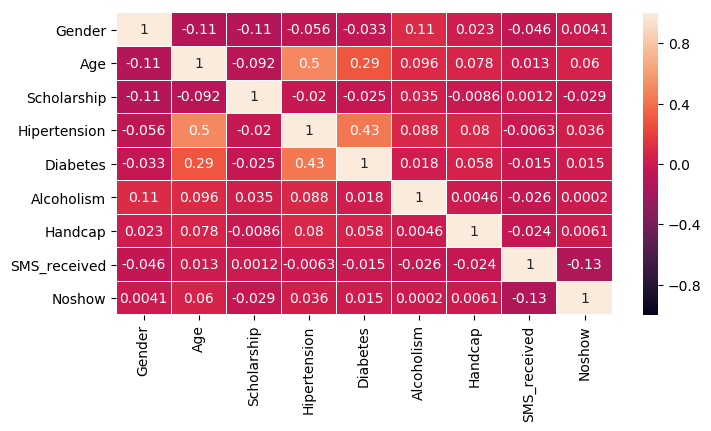

In [29]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.heatmap(df.corr(), vmin = -1, vmax = 1, linewidths=0.01, annot=True)

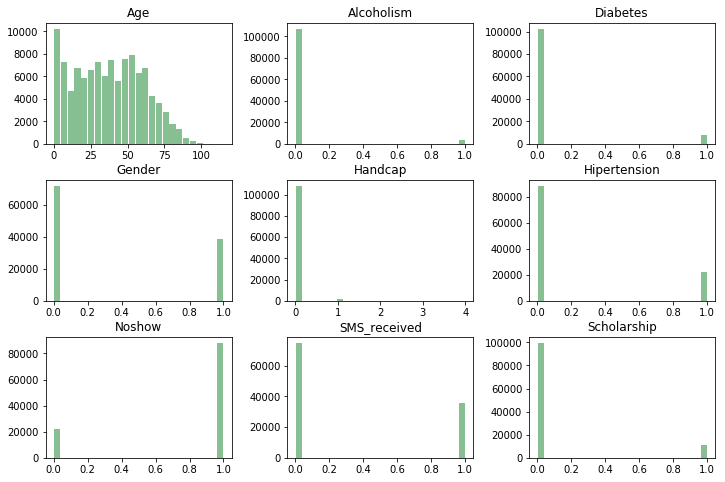

In [30]:
def tlt():
    df.hist(bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9);
    
tlt()

In [31]:
##HOW GENDER AFFECTS SHOWUP
gender_impact = pd.pivot_table(data = df, index = "Gender", values = "Noshow")
round(gender_impact * 100,2)


,Noshow
Gender,
0,79.69
1,80.03


In [32]:
####HOW DDOES SMS RECIEVED AFFECT SHOWUP?
gend_diab_impact = pd.pivot_table(data = df, index = ["Gender", "SMS_received"], values = "Noshow")
round(gend_diab_impact * 100, 2)

Noshow
Gender SMS_received        
0      0              83.47
       1              72.23
1      0              82.99
       1              72.84

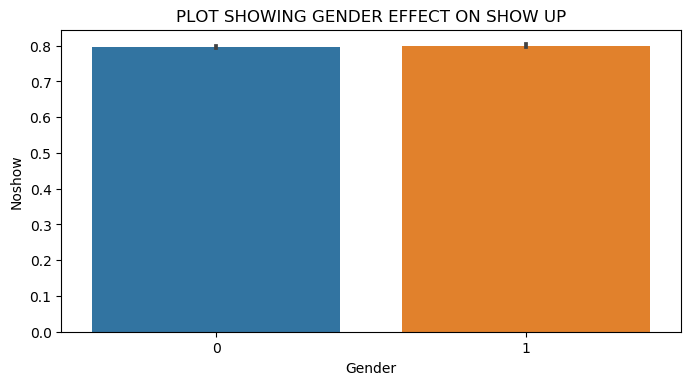

In [33]:
def gnd (ds) :
    plt.figure(figsize = (8,4), dpi = 100)
    sns.barplot(x=ds, y=df.Noshow)
    plt.title("PLOT SHOWING GENDER EFFECT ON SHOW UP");
plt.show()

gnd(df.Gender)

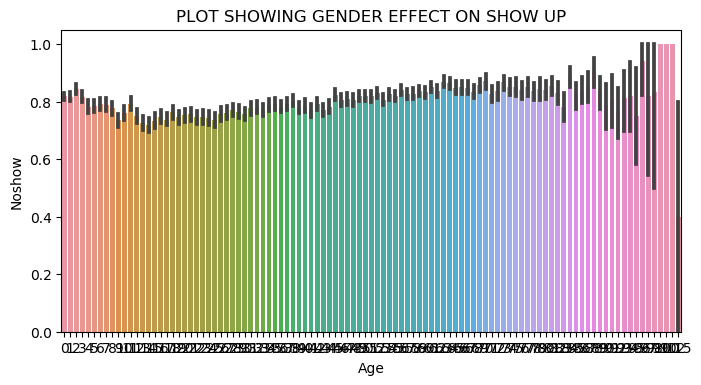

In [34]:
gnd(df.Age)

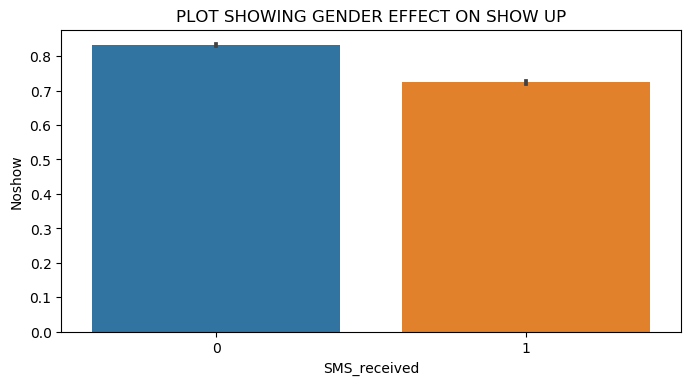

In [39]:
gnd(df.SMS_received)

We can conclude that the gender has no effect on show up for appointment as age, scholarship 
,and sms recieved are not factors affecting show up.

### Research Question 2  (Does some factors like Scholarship and been diabetic affect showup!)

In [35]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
#HOW GENDER ADN SCHOLARSHIP AFFECTS SHOWUP
gend_diab_impact = pd.pivot_table(data = df, index = ["Gender", "Scholarship"], values = "Noshow")
round(gend_diab_impact * 100, 2) 

Noshow
Gender Scholarship        
0      0             80.17
       1             76.21
1      0             80.23
       1             76.49

In [36]:
# Does being diabetic makes a gender difference?
gend_diab_impact = pd.pivot_table(data = df, index = ["Gender", "Diabetes"], values = "Noshow")
round(gend_diab_impact * 100, 2) 

Noshow
Gender Diabetes        
0      0          79.50
       1          81.86
1      0          79.88
       1          82.33

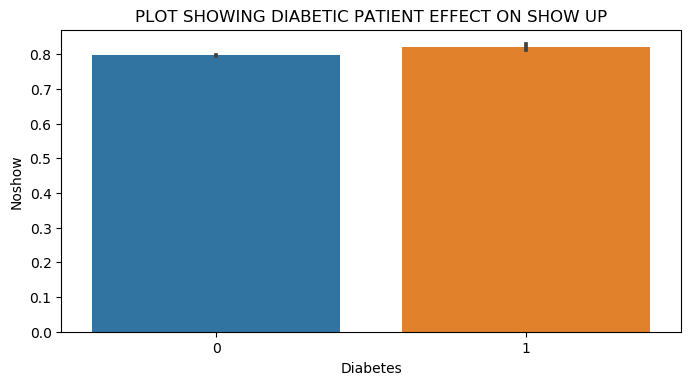

In [37]:
plt.figure(figsize = (8,4), dpi = 100)
sns.barplot(x=df.Diabetes, y=df.Noshow)
plt.title("PLOT SHOWING DIABETIC PATIENT EFFECT ON SHOW UP");
plt.show()

<a id='conclusions'></a>
## Conclusions


After  investigating  the correlation between some of the characteristics of the patients and whether they missed or showed to their appointment. And these are the results of these analyses:

patients from 12 to mid-30s are more likely to miss their appointments

kids and patients in their 60s, 70s, and 80s are more likely to show to their appointments

There is no correlation between gender alone and missing the appointment.


Receiving an SMS did not increase the chance that the patient would show to their appointment.


#### LIMITATIONS

Some of the data are not needed to make up a proper analysis for no show.
Location variable should have also been a good variable for analysis but it is not properly structured or 
peculiar to certain locations


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0